# Task 4: Location-based Analysis

## Objective
Perform a geographical analysis of the restaurants in the dataset.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Load the dataset
df = pd.read_csv('dataset.csv')

# Step 1: Explore latitude and longitude coordinates
# Visualize distribution on a map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(m)
m.save('restaurant_distribution_map.html')

# Step 2: Group restaurants by city or locality
# Analyze concentration of restaurants in different areas
city_counts = df['City'].value_counts()
locality_counts = df['Locality'].value_counts()

# Step 3: Calculate statistics by city or locality
avg_ratings_by_city = df.groupby('City')['Aggregate rating'].mean()
avg_price_by_city = df.groupby('City')['Average Cost for two'].mean()

def top_cuisine(x):
    if len(x) > 0:
        return x.value_counts().index[0]
    else:
        return None

top_cuisines_by_city = df.groupby('City')['Cuisines'].apply(lambda x: top_cuisine(x.dropna() if not x.empty else pd.Series()))

# Step 4: Identify insights or patterns related to locations
# For example, you can print or visualize the calculated statistics
print("Average Ratings by City:")
print(avg_ratings_by_city)
print("\nAverage Price by City:")
print(avg_price_by_city)
print("\nTop Cuisines by City:")
print(top_cuisines_by_city)

Average Ratings by City:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

Average Price by City:
City
Abu Dhabi           182.000000
Agra               1065.000000
Ahmedabad           857.142857
Albany               19.750000
Allahabad           517.500000
                      ...     
Weirton              25.000000
Wellington City      71.250000
Winchester Bay       25.000000
Yorkton              25.000000
��stanbul            81.428571
Name: Average Cost for two, Length: 141, dtype: float64

Top Cuisines by City:
City
Abu Dhabi                                                   American
Agra                                           North Indian, Mughlai
Ahmedabad         

In [4]:
import folium
import pandas as pd
import folium
from IPython.display import display, IFrame

# Initialize map centered around the mean latitude and longitude
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# Add markers for each restaurant
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(m)

# Save the map to an HTML file
m.save('restaurant_distribution_map.html')


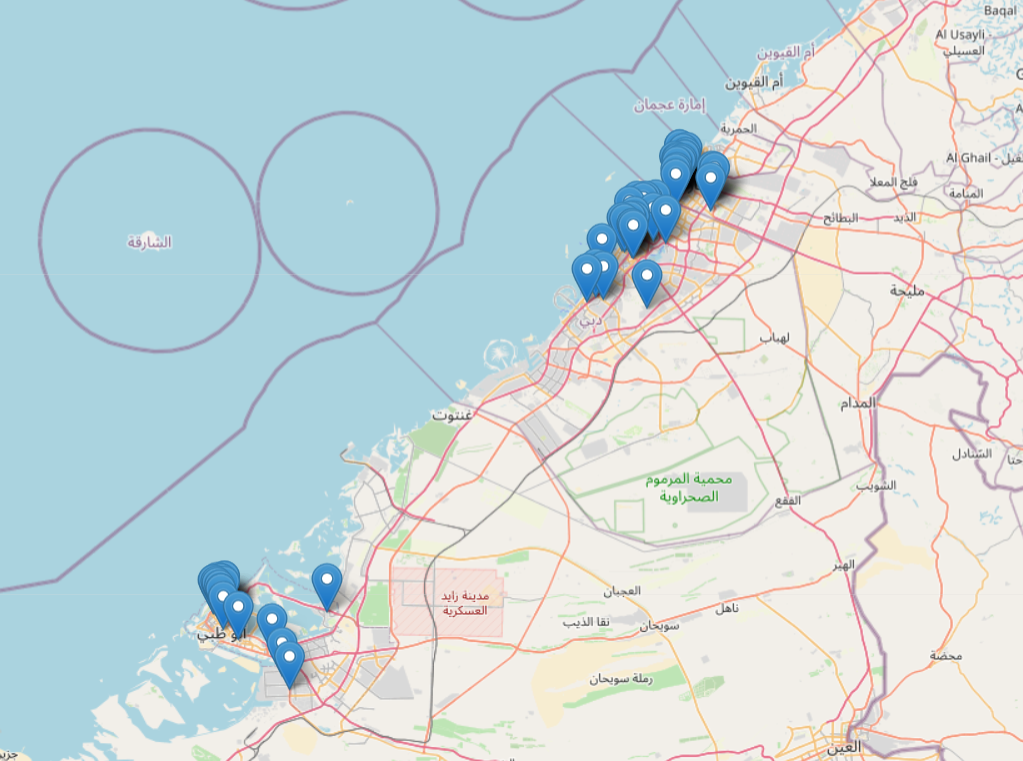

In [8]:
from IPython.display import Image, display

# Display the image
display(Image(filename='map.png'))


# Results
The geographical analysis of restaurants based on user preferences reveals intriguing insights into dining trends across different cities. The average ratings by city show variations, with Abu Dhabi leading at 4.30, indicating a strong culinary scene. In contrast, Albany records a lower average rating of 3.56, suggesting potential areas for culinary improvement. The average prices for two people also exhibit diversity, ranging from 19.75 in Albany to a higher 1065 in Agra, reflecting the cost variations and economic dynamics of dining out in these regions. Exploring the top cuisines by city uncovers rich culinary diversity, such as American cuisine dominating in Abu Dhabi, while Agra boasts a blend of North Indian and Mughlai flavors. These findings underscore the importance of location-specific culinary preferences and the need for tailored restaurant recommendations based on such nuanced data. This analysis not only sheds light on dining preferences but also highlights the vibrant food culture present in different cities, shaping the gastronomic landscape